In [21]:
# Import libraries and data
import os
import numpy as np
import pickle

from src.utils.linear_regressor import perform_linear_regression
from config.settings import ROOT_DIR, saved_models_path
from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = columns




## Acceleration model (8 parameter)

Here we solve the following system

$$ s_i(k+1) - s_i(k) = 
    \begin{bmatrix} 
         s_i(k-1) 
        &s_i(k-2) 
        &v_i(k)   
        &v_i(k-1)
        &v_i(k+1)
        &v_i(k)  
        &v_i(k-1) 
        &v_i(k-2) 
    \end{bmatrix} 
    \begin{bmatrix} 
        \theta_{s_1}                                 
        \\ \theta_{s_2}                                 
        \\ \theta_{s_3}                                 
        \\ \theta_{s_4}                                
        \\ \frac{\theta_{s_5}}{\theta_{v_4}}            
        \\ \frac{\theta_{s_5}\theta_{v_1}}{\theta_{v_4}}
        \\ \frac{\theta_{s_5}\theta_{v_2}}{\theta_{v_4}}
        \\ \frac{\theta_{s_5}\theta_{v_3}}{\theta_{v_4}}
    \end{bmatrix} $$

To solve this we use:
$$\begin{equation}
||t-Ax||^2
\end{equation}$$


### Data shifting

In [ ]:
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:



In [26]:
# for the x entries
A_x = np.column_stack([
    s_x[1:-2],          # s_i(k-1)
    s_x[0:-3],          # s_i(k-2)
    v_x[2:-1],          # v_i(k)
    v_x[1:-2],          # v_i(k-1)
    v_x[3:],            # v_i(k+1)
    v_x[2:-1],          # v_i(k)
    v_x[1:-2],          # v_i(k-1)
   -v_x[0:-3]           # -v_i(k-2)
])

t_x = np.array(s_x[3:] - s_x[2:-1])

print("A matrix: " + str(A_x.shape))
print("Target Matrix: " + str(np.array(t_x).shape))


A matrix: (205272, 8)
Target Matrix: (205272,)


In [28]:
# For the y entries
A_y = np.column_stack((
    s_y[1:-2],          # s_i(k-1)
    s_y[0:-3],          # s_i(k-2)
    v_y[2:-1],          # v_i(k)
    v_y[1:-2],          # v_i(k-1)
    v_y[3:],            # v_i(k+1)
    v_y[2:-1],          # v_i(k)
    v_y[1:-2],          # v_i(k-1)
   -v_y[0:-3]           # -v_i(k-2)
))


t_y = np.array(s_y[3:] - s_y[2:-1])

print("A matrix: " + str(A_y.shape))
print("Target Matrix: " + str(np.array(t_y).shape))


A matrix: (205272, 8)
Target Matrix: (205272,)


In [29]:
A_x

array([[ -0.04689,   0.     ,  -1.20806, ...,  -1.20806,  -1.20844,
          1.20819],
       [ -0.09698,  -0.04689,  -1.20726, ...,  -1.20726,  -1.20806,
          1.20844],
       [ -0.14658,  -0.09698,  -1.20636, ...,  -1.20636,  -1.20726,
          1.20806],
       ...,
       [ 16.36797,  15.81951,  13.7343 , ...,  13.7343 ,  13.73136,
        -13.72867],
       [ 16.91658,  16.36797,  13.73744, ...,  13.73744,  13.7343 ,
        -13.73136],
       [ 17.46545,  16.91658,  13.7408 , ...,  13.7408 ,  13.73744,
        -13.7343 ]])

### Regressor

Mean Squared Error (MSE): 1.1687e+01
Mean Absolute Error (MAE): 2.9387e-01
R-squared (R²) Score: 4.2114e-01
Coefficients:
-0.002233040568790045
-0.0029453980108570233
-1.9287079723302412
0.0044110704134625155
3.8648631077863103
-1.9287079723302472
0.004411070413459852
-0.024824240436629022


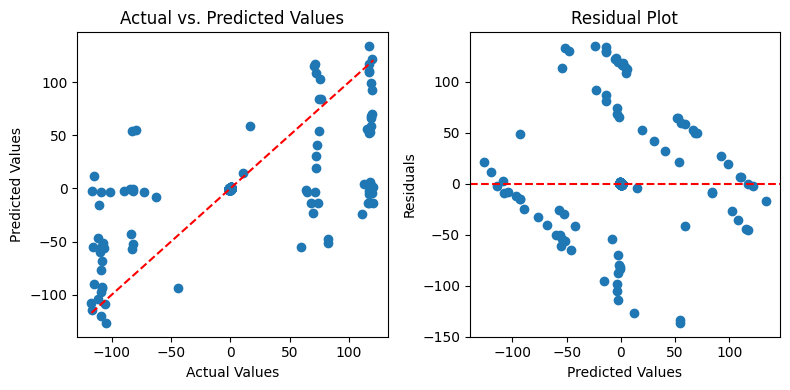

LinearRegression()

In [30]:
# linear regression for x 
perform_linear_regression(A_x, t_x)

Mean Squared Error (MSE): 2.8725e+00
Mean Absolute Error (MAE): 1.6359e-01
R-squared (R²) Score: 5.9644e-01
Coefficients:
0.001006003792636581
-0.0043530011291126386
-2.158496662710262
-0.00190550111769981
4.315851860869335
-2.1584966627102657
-0.001905501117703586
-0.035132668998093704


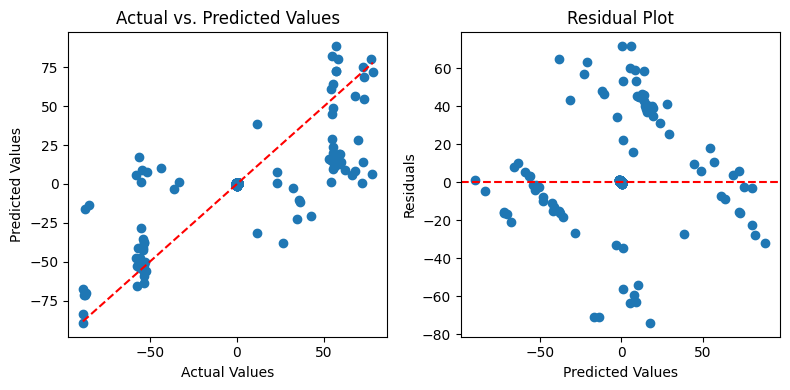

LinearRegression()

In [31]:
# linear regression for y
perform_linear_regression(A_y, t_y)